In [18]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler



In [19]:

# Load dataset
df = pd.read_csv('dataset_limbah_energi.csv')
df.head()


,Jenis Limbah,Berat (kg),Kadar Air (%),Estimasi Energi (kWh)
0,Sekam Padi,210.80,10.69,758.29
1,Kulit Kakao,486.99,42.54,1360.26
2,Kulit Kopi,39.70,20.79,126.66
3,Jerami Padi,409.16,44.05,747.19
4,Jerami Padi,304.00,46.41,531.73


In [20]:

# 1. Pra-pemrosesan Data
# Cek missing value
print(df.isnull().sum())

# Encoding variabel kategori (Jenis Limbah)
le = LabelEncoder()
df['Jenis Limbah'] = le.fit_transform(df['Jenis Limbah'])

# Normalisasi berat dan kadar air
scaler = StandardScaler()
df[['Berat (kg)', 'Kadar Air (%)']] = scaler.fit_transform(df[['Berat (kg)', 'Kadar Air (%)']])

# Tampilkan informasi struktur data
df.info()

# Tampilkan 5 baris pertama setelah diproses
df.head()


Jenis Limbah             0
Berat (kg)               0
Kadar Air (%)            0
Estimasi Energi (kWh)    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Jenis Limbah           2000 non-null   int32  
 1   Berat (kg)             2000 non-null   float64
 2   Kadar Air (%)          2000 non-null   float64
 3   Estimasi Energi (kWh)  2000 non-null   float64
dtypes: float64(3), int32(1)
memory usage: 54.8 KB


,Jenis Limbah,Berat (kg),Kadar Air (%),Estimasi Energi (kWh)
0,7,-0.344948,-1.647673,758.29
1,2,1.605917,1.090811,1360.26
2,4,-1.553512,-0.779269,126.66
3,1,1.056166,1.220642,747.19
4,1,0.313369,1.423556,531.73


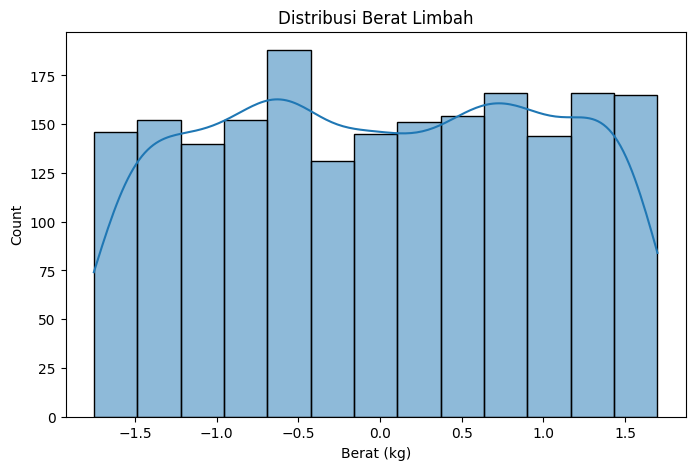

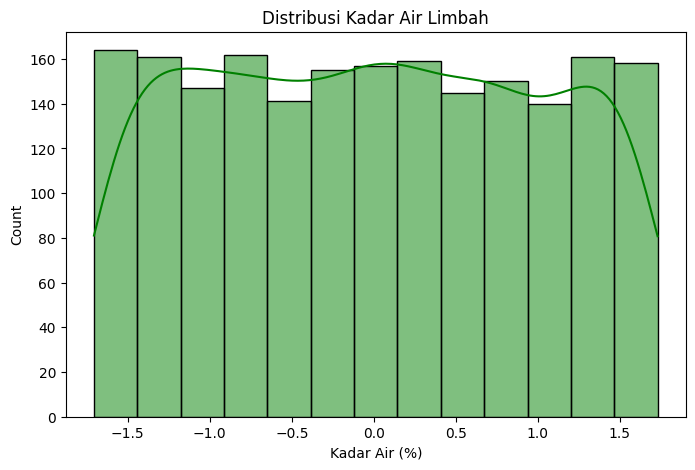

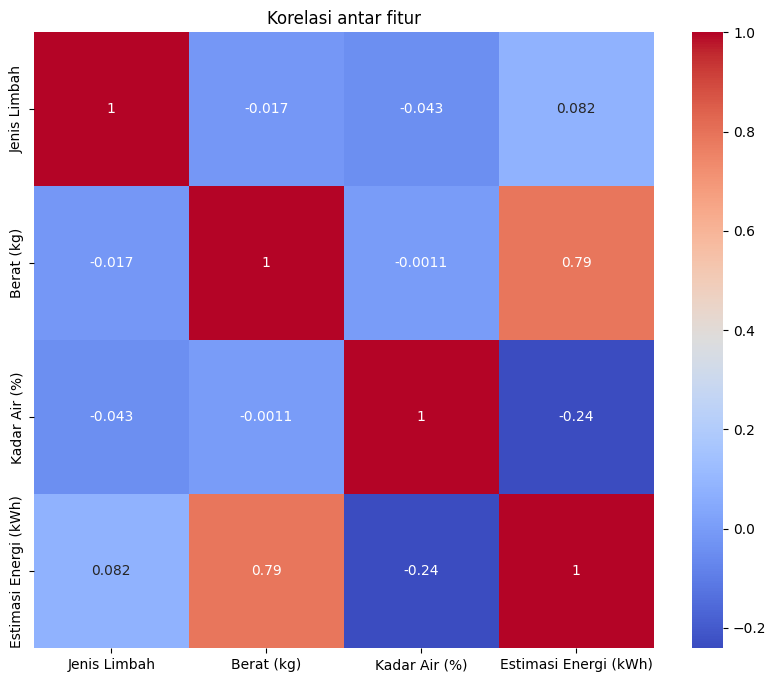

In [21]:

# 2. Exploratory Data Analysis (EDA)

# Visualisasi distribusi berat
plt.figure(figsize=(8,5))
sns.histplot(df['Berat (kg)'], kde=True)
plt.title('Distribusi Berat Limbah')
plt.show()

# Visualisasi distribusi kadar air
plt.figure(figsize=(8,5))
sns.histplot(df['Kadar Air (%)'], kde=True, color='green')
plt.title('Distribusi Kadar Air Limbah')
plt.show()

# Korelasi antar fitur
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar fitur')
plt.show()


In [22]:

# 3. Pemilihan Algoritma dan Pelatihan Model

X = df.drop('Estimasi Energi (kWh)', axis=1)
y = df['Estimasi Energi (kWh)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
model





RandomForestRegressor(random_state=42)

In [23]:

# 4. Evaluasi Model

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R2 Score: {r2:.2f}")


Mean Absolute Error (MAE): 24.12
Mean Squared Error (MSE): 1170.90
R2 Score: 0.99



Hasil Cross Validation (R2 tiap fold): [0.99362844 0.9939722  0.99438302 0.99357774 0.99492051]
Rata-rata R2: 0.9940963835560657


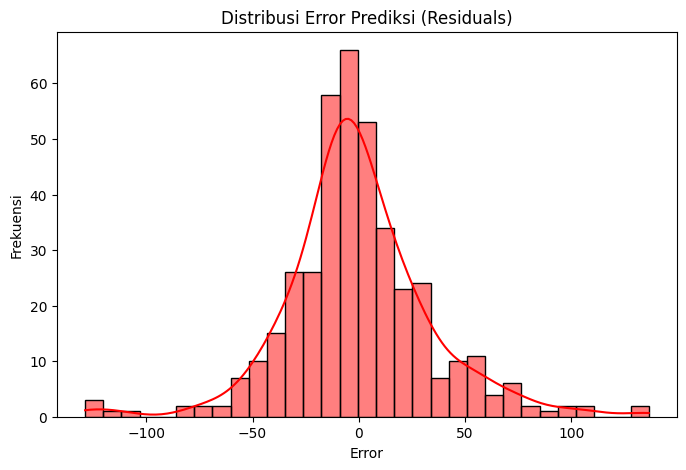

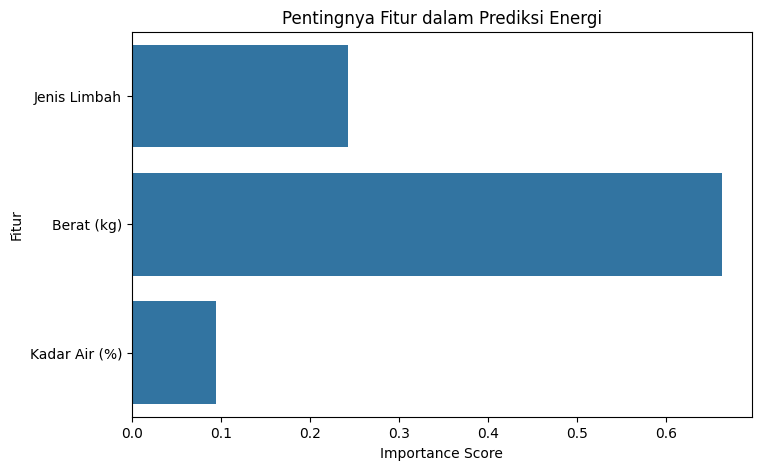

In [24]:
# VALIDASI MODEL DENGAN CROSS VALIDATION
from sklearn.model_selection import cross_val_score

# Menggunakan cross-validation 5-fold
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("\nHasil Cross Validation (R2 tiap fold):", cv_scores)
print("Rata-rata R2:", cv_scores.mean())

# ANALISIS DISTRIBUSI ERROR (RESIDUAL)
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, color='red')
plt.title('Distribusi Error Prediksi (Residuals)')
plt.xlabel('Error')
plt.ylabel('Frekuensi')
plt.show()

# FEATURE IMPORTANCE
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=feature_names)
plt.title('Pentingnya Fitur dalam Prediksi Energi')
plt.xlabel('Importance Score')
plt.ylabel('Fitur')
plt.show()



In [25]:

# 5. Optimasi Model (Hyperparameter Tuning)

best_r2 = r2
best_model = model

for n in [50, 100, 150]:
    for depth in [5, 10, None]:
        temp_model = RandomForestRegressor(n_estimators=n, max_depth=depth, random_state=42)
        temp_model.fit(X_train, y_train)
        temp_r2 = r2_score(y_test, temp_model.predict(X_test))
        if temp_r2 > best_r2:
            best_r2 = temp_r2
            best_model = temp_model

print(f"Best R2 Score after tuning: {best_r2:.2f}")


Best R2 Score after tuning: 0.99
